## Load and view cached auditory spectrograms

Demonstration of how to load a cached auditory spectrogram, select data from it, and view the results.

In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from audiolabel import read_label

## Customize

Provide (1) the path to the textgrid folder; (2) the file to work on (without a filename extension); and (3) the number of spectral slices to pull from each token, centered on the token midpoint.

In [2]:
tgdir = Path(
    'G:/.shortcut-targets-by-id/1HR3dpND6KDuywK8enT1fkmh7Fq1daZlC/09_25_22'
)
tgname = 'AN_F6_DI'   # Name of file to inspect (without extension).
num_slice = 5         # Number of spectral slices to use per token (must be odd)
assert(num_slice % 2 == 1)

Show the path to the auditory spectrogram file.

In [3]:
audspecdir = tgdir / 'audspec.new'
audspfile = audspecdir / f'{tgname}.audspec.npz'
audspfile

WindowsPath('G:/.shortcut-targets-by-id/1HR3dpND6KDuywK8enT1fkmh7Fq1daZlC/09_25_22/audspec.new/AN_F6_DI.audspec.npz')

## Load textgrid data

Read the tiers from the target file and show the tier containing the token productions. Calculate the midpoint of each token and add it as a new column.

In [4]:
[phdf, wddf, proddf] = read_label(str(tgdir / f'{tgname}.TextGrid'), ftype='praat')
proddf['midpt'] = proddf.loc[:, ['t1', 't2']].mean(axis='columns')
proddf

,t1,t2,label,fname,midpt
0,0.000000,63.836094,,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,31.918047
1,63.836094,63.875585,t,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,63.855839
2,63.875585,63.946124,h,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,63.910855
3,63.946124,183.417368,,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,123.681746
4,183.417368,183.449148,t,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,183.433258
...,...,...,...,...,...
232,1527.110621,1527.161316,h,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,1527.135968
233,1527.161316,1566.195832,,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,1546.678574
234,1566.195832,1566.287261,t,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,1566.241546
235,1566.287261,1566.358744,h,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,1566.323003


## Load cached auditory spectrogram data

Create and show the filename of the cached auditory spectrogram.

In [5]:
audspfile = tgdir / 'audspec.new' / f'{tgname}.audspec.npz'
audspfile

WindowsPath('G:/.shortcut-targets-by-id/1HR3dpND6KDuywK8enT1fkmh7Fq1daZlC/09_25_22/audspec.new/AN_F6_DI.audspec.npz')

Load the auditory spectrogram data in `mmap` mode, which is fast because it does not load all of the data into memory immediately.

The properties of the `AudSpec` object are stored in the `.npz` archive as different files. The following lists their names.

In [6]:
d = np.load(audspfile, mmap_mode='r')
for k in d.files:
    print(k)

allow_pickle
fs
dft_n
spect
spect_times
inc
topbark
ncoef
zinc
fft_freqs
zfreqs
freqs
step_size
maxcbfiltn
cbfiltn
cbfilts
window
loud
spect_times_linspace
zgram
igram
lgram
ogram
foo
custom_vars


You access any of the values in the `.npz` file as if it were a dictionary. Here the `AudSpec` object's `fs` attribute is accessed via the corresponding key.

In [7]:
d['fs']

array(22050., dtype=float32)

The `custom_vars` value contains the names of the additional variables that were cached with the `AudSpec` object.

In [8]:
d['custom_vars']

array(['igram', 'lgram', 'ogram', 'foo'], dtype='<U5')

The auditory spectrogram is the `zgram` property, with dimensions (time, frequency).

In [9]:
d['zgram'].shape

(314508, 86)

The times for the spectral slices in the spectrogram are found in `spect_times`, which matches the  size of `zgrams`'s first dimension.

In [10]:
print(len(d['spect_times']))
d['spect_times']

314508


array([2.32199546e-02, 2.82086168e-02, 3.31972789e-02, ...,
       1.56898240e+03, 1.56898739e+03, 1.56899238e+03])

The frequency bins of the spectrogram are in `freqs` (Hz) and `zfreqs` (Bark). These match the size of `zgrams`'s second dimension.

In [11]:
print(len(d['freqs']))
d['freqs']

86


array([   26.34313936,    52.72952987,    79.20249369,   105.80549512,
         132.58221196,   159.57660722,   186.83300131,   214.39614479,
         242.31129186,   270.62427466,   299.38157848,   328.63041816,
         358.41881551,   388.79567826,   419.81088025,   451.51534341,
         483.96112132,   517.20148465,   551.29100867,   586.28566285,
         622.2429027 ,   659.22176417,   697.28296054,   736.48898208,
         776.90419872,   818.59496566,   861.62973236,   906.07915491,
         952.01621202,   999.51632488,  1048.65748093,  1099.52036197,
        1152.18847656,  1206.74829719,  1263.28940221,  1321.9046229 ,
        1382.69019593,  1445.74592132,  1511.17532631,  1579.08583533,
        1649.58894641,  1722.80041417,  1798.84043994,  1877.83386907,
        1959.91039591,  2045.20477677,  2133.85705115,  2226.01277167,
        2321.82324301,  2421.4457704 ,  2525.0439178 ,  2632.78777653,
        2744.85424447,  2861.42731654,  2982.69838675,  3108.86656246,
      

## Add indexes of midpoints

For each `midpt` value in `proddf`, find the index of the closest time value in `d['spect_times']` and add it as a new column. 

In [12]:
proddf['midpt_idx'] = [np.argmin(np.abs(d['spect_times'] - m)) for m in proddf['midpt']]
proddf

,t1,t2,label,fname,midpt,midpt_idx
0,0.000000,63.836094,,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,31.918047,6393
1,63.836094,63.875585,t,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,63.855839,12796
2,63.875585,63.946124,h,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,63.910855,12807
3,63.946124,183.417368,,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,123.681746,24788
4,183.417368,183.449148,t,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,183.433258,36765
...,...,...,...,...,...,...
232,1527.110621,1527.161316,h,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,1527.135968,306117
233,1527.161316,1566.195832,,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,1546.678574,310034
234,1566.195832,1566.287261,t,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,1566.241546,313956
235,1566.287261,1566.358744,h,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,1566.323003,313972


(Another view of the result of the preceding step--if you use the `proddf['midpt_idx']` indexes on the `d['times']` array you get values that are very close to the midpoints shown in `proddf['midpt']`. The first five values are shown here.)

In [13]:
d['spect_times'][proddf['midpt_idx']][:5]

array([ 31.91573696,  63.85814059,  63.91301587, 123.68217687,
       183.43138322])

## Select data

Next select data to be used as inputs to the Support Vector Machine functions.

First, make a subset of `proddf` that holds tokens of interest. Shown here is a subset of non-empty tokens, sorted by label.

In [14]:
labelled = proddf[proddf['label'] != ''].sort_values('label')
print(f'number of tokens: {len(labelled)}')
labelled

number of tokens: 158


,t1,t2,label,fname,midpt,midpt_idx
235,1566.287261,1566.358744,h,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,1566.323003,313972
102,785.720816,785.761102,h,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,785.740959,157501
183,1304.473805,1304.572863,h,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,1304.523334,261493
99,750.764044,750.855212,h,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,750.809628,150499
96,735.614914,735.680343,h,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,735.647629,147459
...,...,...,...,...,...,...
86,692.622300,692.667058,t,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,692.644679,138839
234,1566.195832,1566.287261,t,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,1566.241546,313956
117,863.793378,863.850971,t,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,863.822174,173152
125,884.838225,884.901439,ʃ,G:\.shortcut-targets-by-id\1HR3dpND6KDuywK8enT...,884.869832,177372


Create a 1D array of indexes into the `spect_times` dimension of the auditory spectrogram. In the case where `num_slice = 5`, this index will consist of two slices before the `midpt_idx` and two slices after. In other words, we have the indexes of five-spectrum windows centered at each midpoint. The first 10 indexes are shown, and each group of five are consecutive integers.

In [15]:
offset = int(np.floor(num_slice / 2))
specidx = np.ravel([np.arange(m - offset, m + offset + 1) for m in labelled['midpt_idx']])
print(specidx[:10])

[313970 313971 313972 313973 313974 157499 157500 157501 157502 157503]


Also create a 1D array of the corresponding times for each spectral slice selected by `specidx`. Again there are groups of five and the first ten are shown. The distance between consecutive slices in a group is the `step` value used in the analysis, approximately 5ms.

In [16]:
spectimes = d['spect_times'][specidx]
print(spectimes[:10])

[1566.31346939 1566.31845805 1566.32344671 1566.32843537 1566.33342404
  785.73251701  785.73750567  785.74249433  785.74748299  785.75247166]


Use the indexes to select values from the auditory spectrogram. The spectral slices for the tokens are stored along the first axis of the result, with 5 spectral slices per token. The second axis represents frequency bins.

In [17]:
layer = 'zgram'   # Could be igram, lgram, ogram
specs = d[layer][specidx]
print(f'specs shape {specs.shape} (token-slices, spectral data)')
print(f'number of tokens * number of spectral slices: {len(labelled)*num_slice}')

specs shape (790, 86) (token-slices, spectral data)
number of tokens * number of spectral slices: 790


It is fairly easy to see the discontinuities at the edges of each token in the resulting spectrogram of all tokens. The `transpose` operation is used to make time the x-axis and frequency the y-axis of the spectrogram.

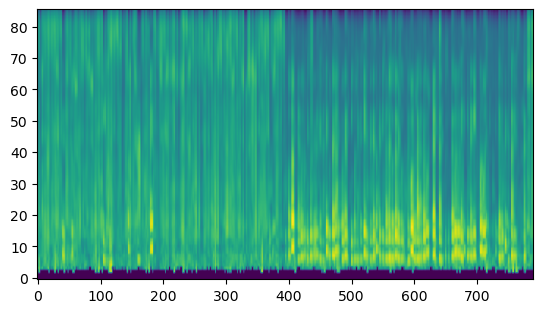

In [18]:
plt.imshow(specs.transpose(), origin="lower", aspect=5.0)

To display the spectrogram of a single token you can choose the integer index of a token from `labelled` and use that to take a slice of `specs` and `spectimes`.

Be careful not to confuse the Pandas [location index and the label index](https://pandas.pydata.org/docs/user_guide/indexing.html#different-choices-for-indexing). Here we are choosing an index by location in order to match numpy's array index, and `tokenidx = 2` matches the third row in `labelled`, which isn't necessarily the row with the value `2` in the label index.

Showing spectrogram of slices of token "h" at times [1304.51346939 1304.51845805 1304.52344671 1304.52843537 1304.53342404]


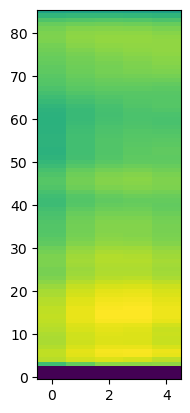

In [19]:
tokenidx = 2  # Can be any integer from 0 to len(labelled) - 1.
tokenrange = np.arange(tokenidx * num_slice, (tokenidx * num_slice) + num_slice)
tokenimg = specs[tokenrange]
tokentimes = spectimes[tokenrange]
print(f'Showing spectrogram of slices of token "{labelled["label"].iloc[tokenidx]}" at times {tokentimes}')
plt.imshow(tokenimg.transpose(), origin="lower", aspect=0.15)

## Reshaping tokens

It can be useful to reshape the spectral data so that all of the spectral data for each token is in the same row. To do this, use the number of tokens as the first argument of [`reshape`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html#numpy.reshape). The dimensions of the new array correspond to (tokens, slice-freqs).

In [20]:
longspecs = specs.reshape(len(labelled), -1)
longspecs.shape

(158, 430)

The discontinuities in the result again make it easy to see the individual spectral slices.

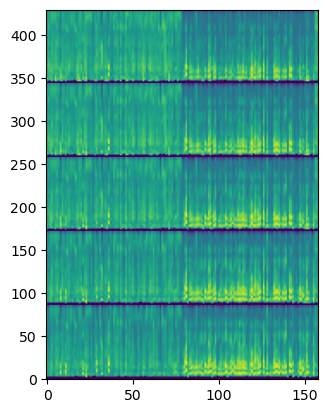

In [21]:
plt.imshow(longspecs.transpose(), origin="lower", aspect=0.5)

The length of the selected labels matches the number of rows in `longspecs`.

In [22]:
labelled['label']

235    h
102    h
183    h
99     h
96     h
      ..
86     t
234    t
117    t
125    ʃ
132    ʃ
Name: label, Length: 158, dtype: object

You now have objects of the type that can be inputs to [`SVC.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.fit). The `y` parameter can be provided by `labelled['label']`, and the `X` parameter by `longspecs`.